# Machine Learning Assignment
## Course Code- 2CS501

### Roll no. : Jay Patel (19BCE085)

## Data-Set : Student Performance

In [1]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# OVERVIEW

Here in this assignment we have decided to take 3 approaches of utilising the datasets provided to us so as to gather a detailed insight of the features, their contribution to the final results and the most optimal model.

In all 3 approaches we have, the feature 'G3' as the target result and all others as the variables contributing.
The 3 approaches are as follows:-

# Approach 1 :-
Here, we have divided the values of 'G3' in 4 different classes namely :0,1,2 and 3. The distribution in the class is as follows:-
Class 0: G3<=9
Class 1: G3=10 or G3=11
Class 2: G3>=12 and G3<=14
Class 3: G3>15

Predicting the exact grade (0-20) would have been a very wasteful approach as all the classes might not have students associated with them and the target classes would be highly imbalanced due to which we decided to divide it into 4 optimal classes. The number of students in each class is shown below.
 
# Approach 2:- 
Here, we have classified the values of 'G3' into two broad classes namely: Pass or Fail. The criteria is:-
Fail: G3<=9
Pass: G3>9

This approach was chosen to merely conclude that dividing the target feature into less no. of classes and almost equal and sufficient class distribution would bare us improved accuracy.
 
# Approach 3:- 
Here, this approach is similar to Approach-2 (mentioned above) but with a difference that we have ommited/not considered the values of G1 and G2 for the prediction of G3. This approach was chosen to determine if the features other than test scores are relevant to the prediction of student performance or not.

# DATA VISUALISATION

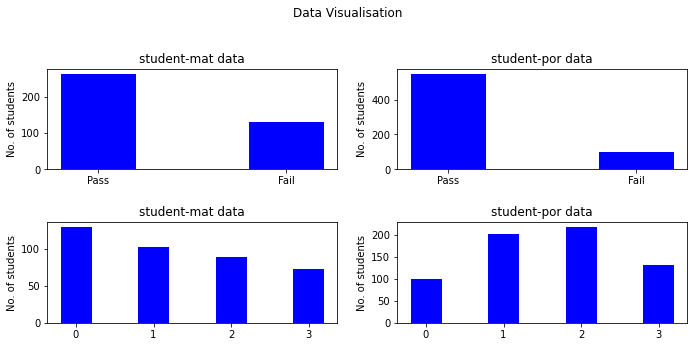

In [2]:
mat=pd.read_csv('student-mat.csv', sep=';')
por=pd.read_csv('student-por.csv', sep=';')
        
pf_mat=[];pf_por=[];class_mat=[];class_por=[]
#figure, axes = plt.subplots(nrows=2, ncols=2)
figure = plt.figure(figsize = (10, 5))
plt.subplot(2, 2, 1)
plt.bar(['Pass','Fail'], [len(mat.loc[mat['G3'] > 9].index),len(mat.loc[mat['G3'] <= 9].index)], color ='blue',width = 0.4)
plt.ylabel("No. of students")
plt.title("student-mat data")

plt.subplot(2, 2, 2)
plt.bar(['Pass','Fail'], [len(por.loc[por['G3'] > 9].index),len(por.loc[por['G3'] <= 9].index)], color ='blue',width = 0.4)
plt.ylabel("No. of students")
plt.title("student-por data")

plt.subplot(2, 2, 3)
plt.bar(['0','1','2','3'], [len(mat[mat['G3'] <= 9].index),len(mat[(mat['G3'] >=10) & (mat['G3']<=11)].index),len(mat[(mat['G3'] >= 12) & (mat['G3']<=14)].index),len(mat[mat['G3'] > 14].index)], color ='blue',width = 0.4)
plt.ylabel("No. of students")
plt.title("student-mat data")

plt.subplot(2, 2, 4)
plt.bar(['0','1','2','3'], [len(por[por['G3'] <= 9].index),len(por[(por['G3'] >=10) & (por['G3']<=11)].index),len(por[(por['G3'] >= 12) & (por['G3']<=14)].index),len(por[por['G3'] > 14].index)], color ='blue',width = 0.4)
plt.ylabel("No. of students")
plt.title("student-por data")
plt.suptitle("Data Visualisation")
figure.tight_layout(pad=2.0)
plt.show()

# Approach 1

In this approach we used Decision Tree Classifier, Gaussian Naive Bayes, Bernoulli Naive Bayes, Multinomial Naive Bayes, KNN and SVM models and grid search used for hyperparameter tuning

In [3]:
labelencoder=LabelEncoder()
mat=pd.read_csv('student-mat.csv', sep=';')
por=pd.read_csv('student-por.csv', sep=';')
for val in mat:
    if isinstance(mat[val][1], str):mat[val] = labelencoder.fit_transform(mat[val])
for val in por:
    if isinstance(por[val][1], str):por[val] = labelencoder.fit_transform(por[val])
        
mat['G3'] = np.where((mat['G3'] <=9), 0, mat['G3'])
mat['G3'] = np.where((mat['G3'] >=10) & (mat['G3'] <=11) , 1, mat['G3'])
mat['G3'] = np.where((mat['G3'] >=12) & (mat['G3'] <=14) , 2, mat['G3'])
mat['G3'] = np.where((mat['G3'] >=15), 3, mat['G3'])

por['G3'] = np.where((por['G3'] <=9), 0, por['G3'])
por['G3'] = np.where((por['G3'] >=10) & (por['G3'] <=11) , 1, por['G3'])
por['G3'] = np.where((por['G3'] >=12) & (por['G3'] <=14) , 2, por['G3'])
por['G3'] = np.where((por['G3'] >=15), 3, por['G3'])
[list(mat['G3']).count(x) for x in range(4)]

[130, 103, 89, 73]

In [4]:
por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,2
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,2
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,1
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,3
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,0
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,1


### Data split

In [5]:
from sklearn.model_selection import train_test_split
X_train_mat,X_test_mat,y_train_mat,y_test_mat=train_test_split(mat.iloc[:,:-1],mat.iloc[:,-1],random_state=4,test_size=0.35)
X_train_por,X_test_por,y_train_por,y_test_por=train_test_split(por.iloc[:,:-1],por.iloc[:,-1],random_state=4,test_size=0.35)

a1=[];b1=[]
a2=[];b2=[]
a3=[];b3=[]
a1.append(0)
b1.append(0)

# Decision Tree Classifier

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'criterion': 'entropy', 'max_depth': 4}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.8345323741007195
----------------------------------------------------------------------------------------------------


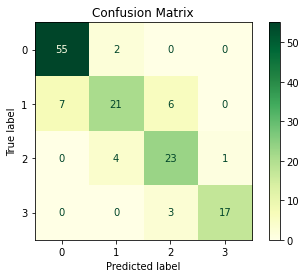

----------------------------------------------------------------------------------------------------


		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'criterion': 'gini', 'max_depth': 4}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.8070175438596491
----------------------------------------------------------------------------------------------------


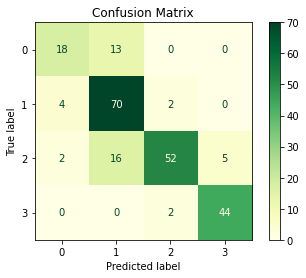

----------------------------------------------------------------------------------------------------


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, auc, roc_auc_score, roc_curve

dt_params = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,17,20]}
grid=GridSearchCV(DecisionTreeClassifier(),dt_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a1.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

print('\n\n\t\tPORTUGUESE\n')
grid2=GridSearchCV(DecisionTreeClassifier(),dt_params)
grid2.fit(X_train_por,y_train_por)
print("-"*100)
print('Best Parameters: ',grid2.best_params_)
print("-"*100)
print('Best Accuracy: ',grid2.score(X_test_por,y_test_por))
b1.append(grid2.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid2, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

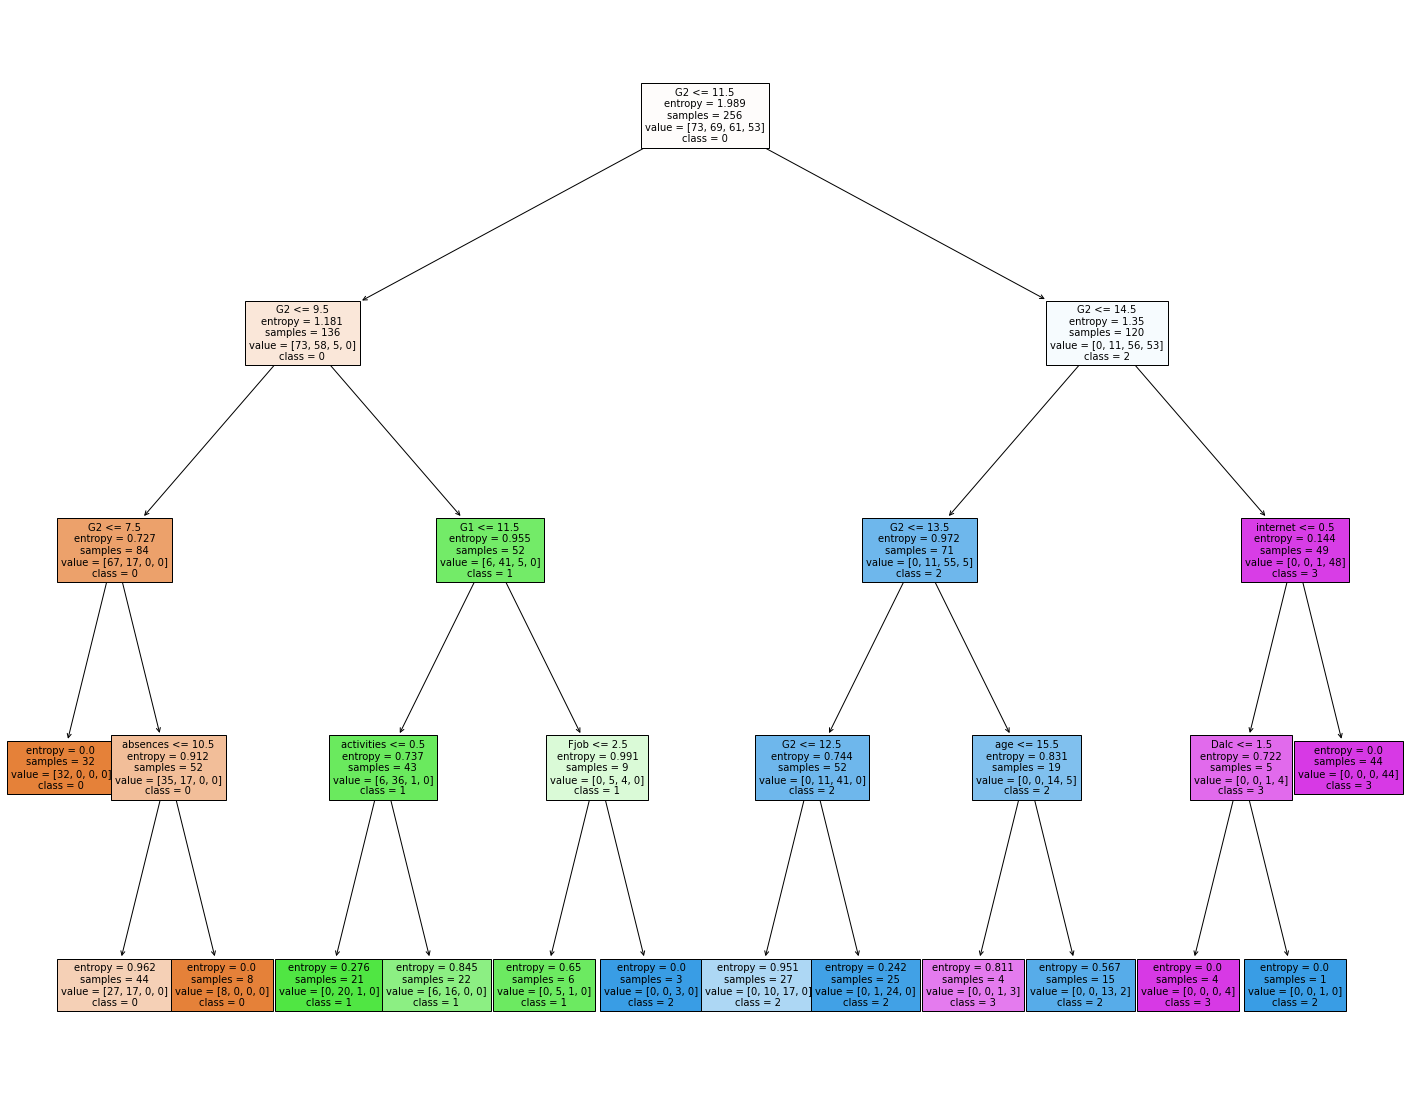

In [7]:
clf = DecisionTreeClassifier(criterion=grid.best_params_['criterion'], max_depth=grid.best_params_['max_depth']).fit(X_train_mat,y_train_mat)
lis=list(mat.columns)
lis.remove('G3')
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=lis,  
                   class_names=['0','1','2','3'],
                   filled=True,fontsize=10)

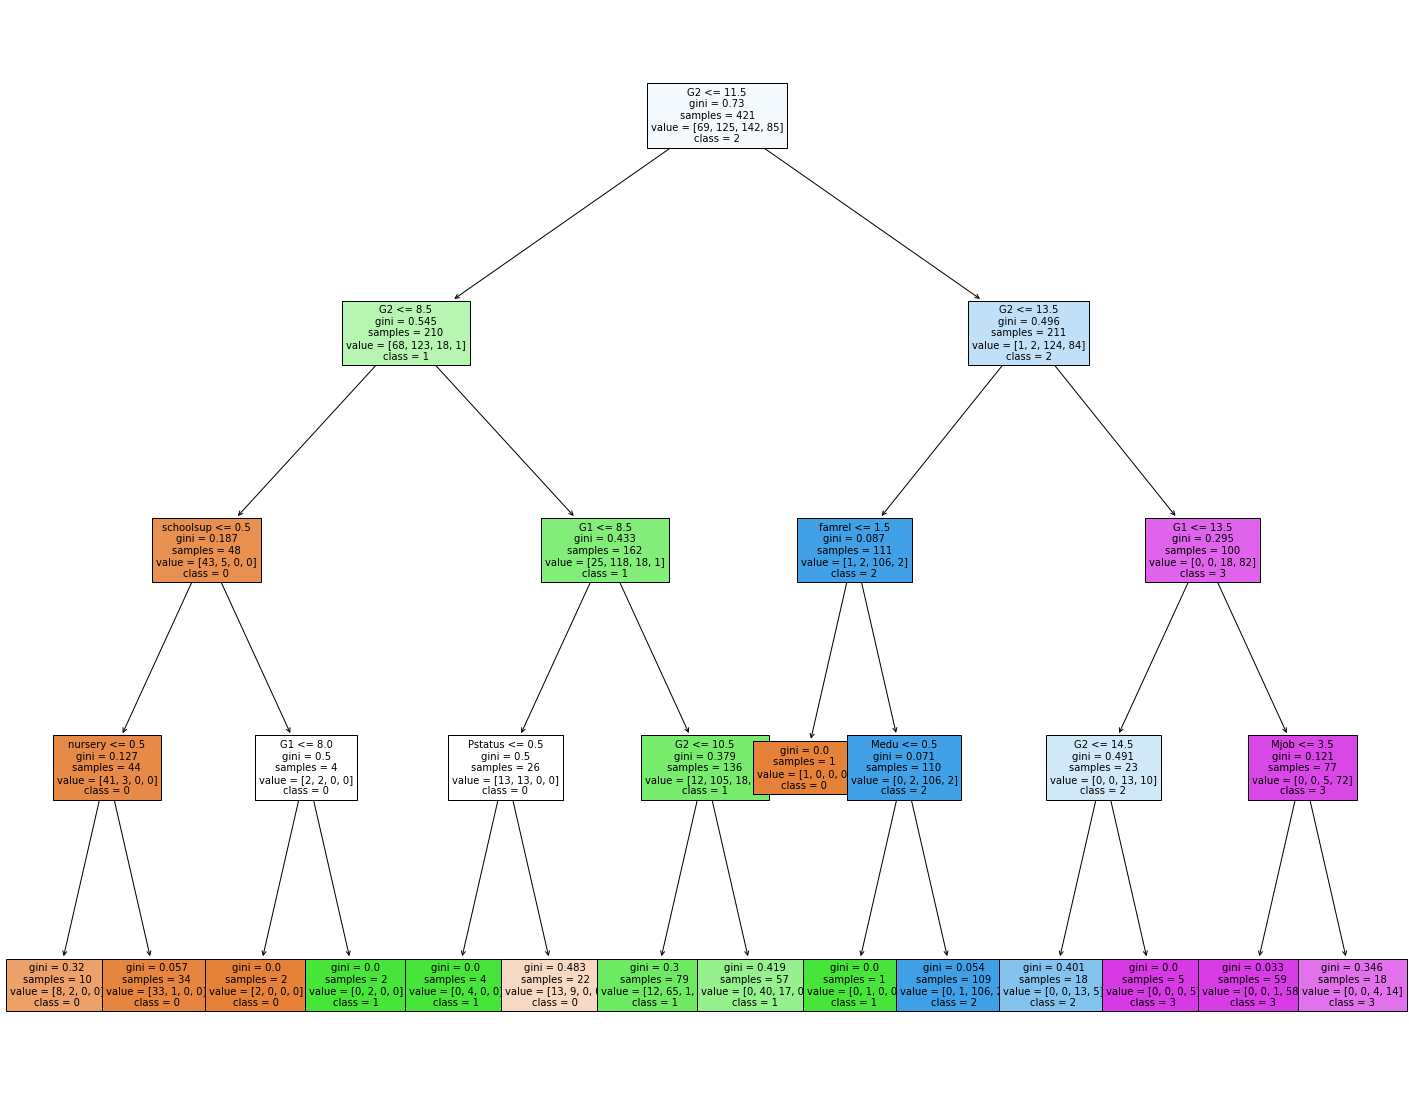

In [8]:
clf = DecisionTreeClassifier(criterion=grid2.best_params_['criterion'], max_depth=grid2.best_params_['max_depth']).fit(X_train_por,y_train_por)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=lis,  
                   class_names=['0','1','2','3'],
                   filled=True,fontsize=10)

# Gaussian Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.6258992805755396
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.88      0.74      0.80        57
           1       0.49      0.59      0.53        34
           2       0.62      0.29      0.39        28
           3       0.46      0.85      0.60        20

    accuracy                           0.63       139
   macro avg       0.61      0.62      0.58       139
weighted avg       0.67      0.63      0.62       139

----------------------------------------------------------------------------------------------------


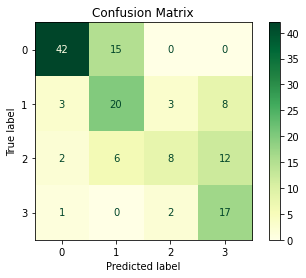

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy: 0.5745614035087719
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.72      0.84      0.78        31
           1       0.77      0.58      0.66        76
           2       0.57      0.23      0.32        75
           3       0.42      0.96      0.58        46

    accuracy                           0.57       228
   macro avg       0.62      0.65      0.59       228
weighted avg       0.63      0.57      0.55       228

----------------------------------------------------------------------------------------------------


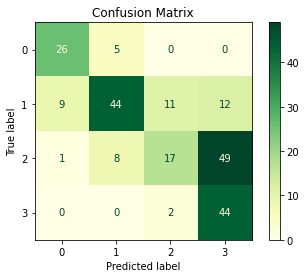

----------------------------------------------------------------------------------------------------


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics

clf=GaussianNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a1.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print("-"*100)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy:',clf.score(X_test_por,y_test_por))
b1.append(clf.score(X_test_por,y_test_por))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# Bernoulli Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.33093525179856115
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.57      0.47      0.52        57
           1       0.22      0.26      0.24        34
           2       0.10      0.07      0.08        28
           3       0.26      0.40      0.31        20

    accuracy                           0.33       139
   macro avg       0.29      0.30      0.29       139
weighted avg       0.35      0.33      0.33       139

----------------------------------------------------------------------------------------------------


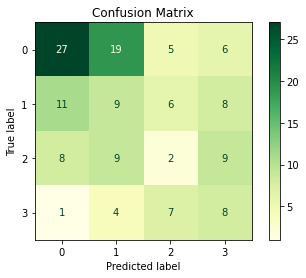

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.40350877192982454
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.40      0.39      0.39        31
           1       0.45      0.39      0.42        76
           2       0.40      0.64      0.49        75
           3       0.20      0.04      0.07        46

    accuracy                           0.40       228
   macro avg       0.36      0.37      0.34       228
weighted avg       0.37      0.40      0.37       228

----------------------------------------------------------------------------------------------------


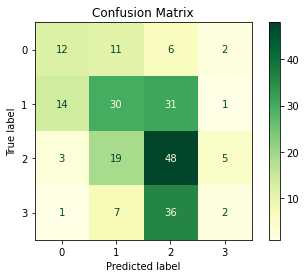

----------------------------------------------------------------------------------------------------


In [10]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets, metrics

clf=BernoulliNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a1.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b1.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# Multinomial Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.5035971223021583
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.73      0.72      0.73        57
           1       0.33      0.35      0.34        34
           2       0.29      0.14      0.19        28
           3       0.39      0.65      0.49        20

    accuracy                           0.50       139
   macro avg       0.44      0.47      0.44       139
weighted avg       0.50      0.50      0.49       139

----------------------------------------------------------------------------------------------------


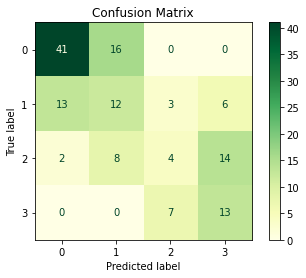

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.4824561403508772
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.38      0.48      0.43        31
           1       0.52      0.36      0.42        76
           2       0.49      0.55      0.52        75
           3       0.50      0.59      0.54        46

    accuracy                           0.48       228
   macro avg       0.47      0.49      0.48       228
weighted avg       0.49      0.48      0.48       228

----------------------------------------------------------------------------------------------------


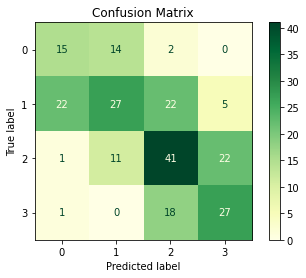

----------------------------------------------------------------------------------------------------


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, metrics

clf=MultinomialNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a1.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b1.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# KNN

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.697841726618705
----------------------------------------------------------------------------------------------------


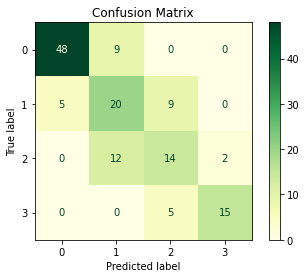

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.7412280701754386
----------------------------------------------------------------------------------------------------


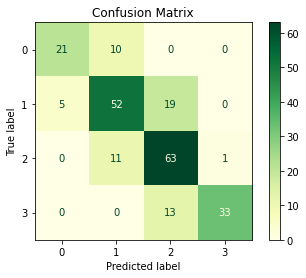

----------------------------------------------------------------------------------------------------


In [12]:
from sklearn import neighbors

knn_params = {'n_neighbors':[x for x in range(1,20,2)],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
grid=GridSearchCV(neighbors.KNeighborsClassifier(),knn_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a1.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

print('\t\tPORTUGUESE\n')
grid.fit(X_train_por,y_train_por)
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_por,y_test_por))
b1.append(grid.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# SVM

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'C': 10, 'degree': 2, 'kernel': 'poly'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.7769784172661871
----------------------------------------------------------------------------------------------------


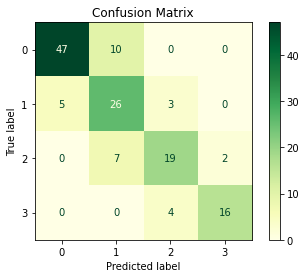

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'C': 1, 'degree': 4, 'kernel': 'poly'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.7982456140350878
----------------------------------------------------------------------------------------------------


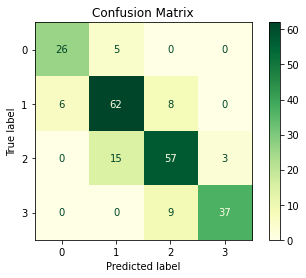

----------------------------------------------------------------------------------------------------


In [13]:
from sklearn.svm import SVC

svc_params={'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear','rbf','poly','sigmoid'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),svc_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a1.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn).ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)


print('\t\tPORTUGUESE\n')
grid.fit(X_train_por,y_train_por)
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_por,y_test_por))
b1.append(grid.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_por, y_test_por, cmap=plt.cm.YlGn).ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

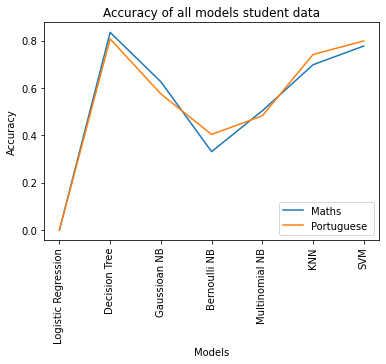

In [14]:
x = [0,1,2,3,4,5,6]
labels = ['Logistic Regression', 'Decision Tree', 'Gaussioan NB', 'Bernoulli NB', 'Multinomial NB', 'KNN', 'SVM']
plt.xticks(x, labels, rotation ='vertical')
plt.plot(a1)
plt.plot(b1)
plt.title("Accuracy of all models student data")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(["Maths", "Portuguese "])

plt.show()

## Conclusion-1

In this approach DT has highest predictive accuracy.
This feature gave us the insight by looking at the decision tree that G2 is the most relevant feature succeded only by G1 which shows that the student performance are highly affected by past results.
DT is a model which is not very sensitive to irrelevant features as compared to the other models due to which we can see DT outperforming other models.

# Approach 2

In this approach we have used Logistic Regression, Decision Tree Classifier, Gaussian Naive Bayes, Bernoulli Naive Bayes, Multinomial Naive Bayes, KNN and SVM models and grid search used for hyperparameter tuning

In [15]:
labelencoder=LabelEncoder()
mat=pd.read_csv('student-mat.csv', sep=';')
por=pd.read_csv('student-por.csv', sep=';')
for val in mat:
    if isinstance(mat[val][1], str):mat[val] = labelencoder.fit_transform(mat[val])
for val in por:
    if isinstance(por[val][1], str):por[val] = labelencoder.fit_transform(por[val])
        
mat['G3'] = np.where((mat['G3'] <=9), 0, mat['G3'])
mat['G3'] = np.where((mat['G3'] >9), 1, mat['G3'])

por['G3'] = np.where((por['G3'] <=9), 0, por['G3'])
por['G3'] = np.where((por['G3'] >9), 1, por['G3'])
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,0
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,1
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,0
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,1


In [16]:
por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,1
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,0
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,1


In [17]:
from sklearn.model_selection import train_test_split
X_train_mat,X_test_mat,y_train_mat,y_test_mat=train_test_split(mat.iloc[:,:-1],mat.iloc[:,-1],random_state=3,test_size=0.35)
X_train_por,X_test_por,y_train_por,y_test_por=train_test_split(por.iloc[:,:-1],por.iloc[:,-1],random_state=3,test_size=0.35)

# Logistic regression

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.8992805755395683
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.83      0.87      0.85        46
           1       0.93      0.91      0.92        93

    accuracy                           0.90       139
   macro avg       0.88      0.89      0.89       139
weighted avg       0.90      0.90      0.90       139

----------------------------------------------------------------------------------------------------


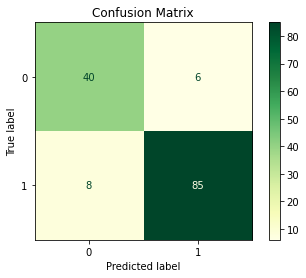

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.9429824561403509
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.95      0.98      0.97       195

    accuracy                           0.94       228
   macro avg       0.91      0.85      0.88       228
weighted avg       0.94      0.94      0.94       228

----------------------------------------------------------------------------------------------------


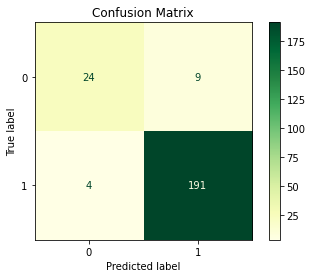

----------------------------------------------------------------------------------------------------


In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_mat,y_train_mat)
y_pred_mat=logreg.predict(X_test_mat)
print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a2.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(logreg, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

logreg.fit(X_train_por,y_train_por)
y_pred_por=logreg.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b2.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(logreg, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# Decision Tree Classifier

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'criterion': 'gini', 'max_depth': 1}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.9136690647482014
----------------------------------------------------------------------------------------------------


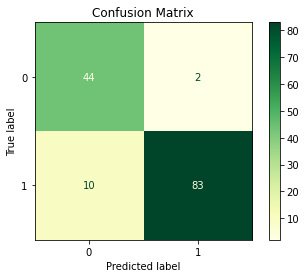

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'criterion': 'gini', 'max_depth': 1}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.9385964912280702
----------------------------------------------------------------------------------------------------


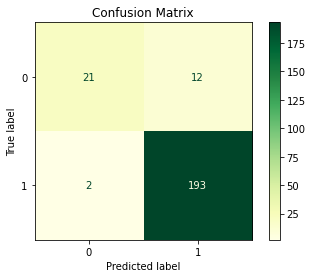

----------------------------------------------------------------------------------------------------


In [19]:
dt_params = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,7,8,9,10,15,20]}
grid=GridSearchCV(DecisionTreeClassifier(),dt_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ', grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a2.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

print('\t\tPORTUGUESE\n')
print("-"*100)
grid2=GridSearchCV(DecisionTreeClassifier(),dt_params)
grid2.fit(X_train_por,y_train_por)
print('Best Parameters: ',grid2.best_params_)
print("-"*100)
print('Best Accuracy: ',grid2.score(X_test_por,y_test_por))
b2.append(grid2.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid2, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

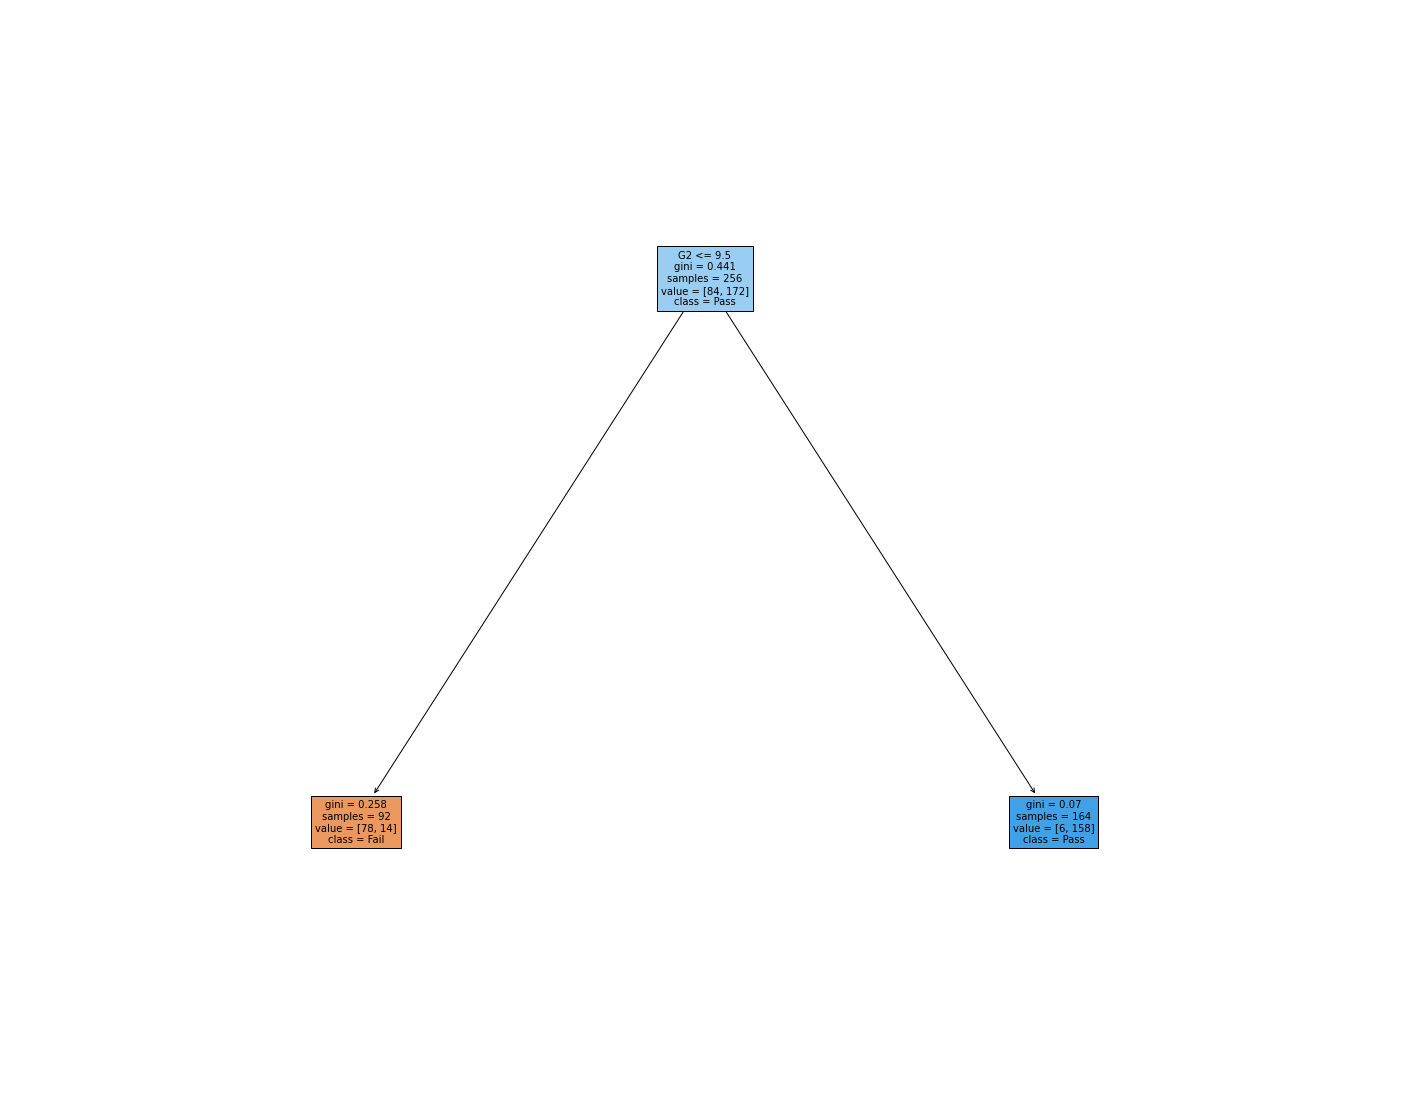

In [20]:
clf = DecisionTreeClassifier(criterion=grid.best_params_['criterion'], max_depth=grid.best_params_['max_depth']).fit(X_train_mat,y_train_mat)
lis=list(mat.columns)
lis.remove('G3')
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=lis,  
                   class_names=['Fail','Pass'],
                   filled=True,fontsize=10)

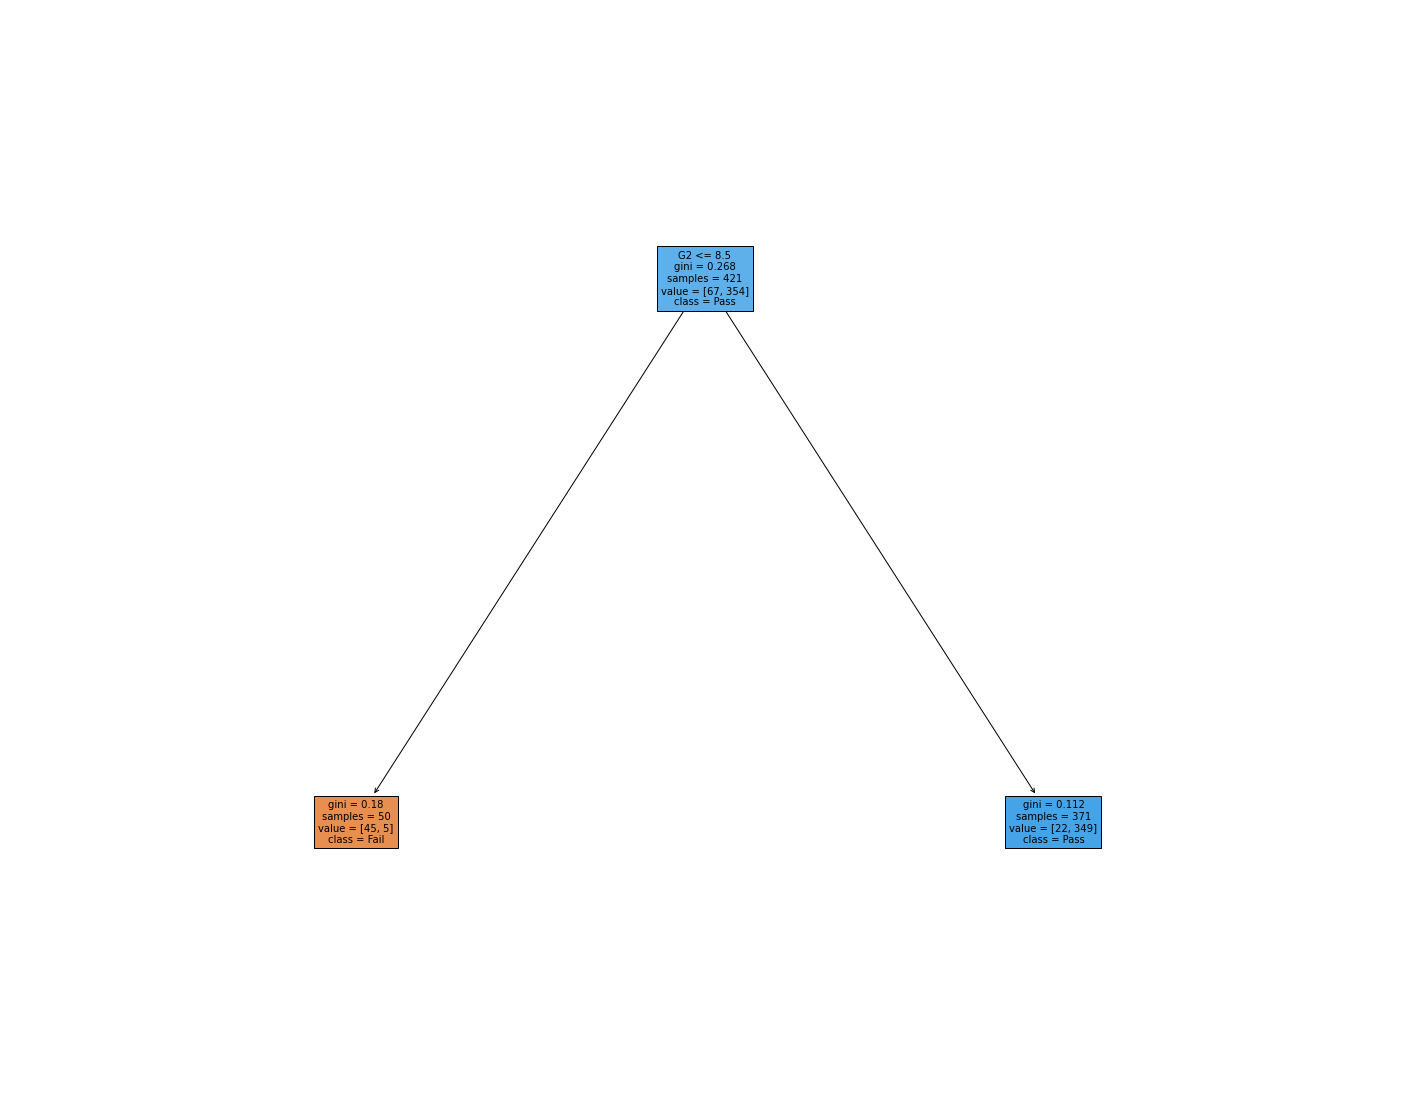

In [21]:
clf = DecisionTreeClassifier(criterion=grid2.best_params_['criterion'], max_depth=grid.best_params_['max_depth']).fit(X_train_por,y_train_por)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=lis,  
                   class_names=['Fail','Pass'],
                   filled=True,fontsize=10)

# Gaussian Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.841726618705036
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.77      0.74      0.76        46
           1       0.87      0.89      0.88        93

    accuracy                           0.84       139
   macro avg       0.82      0.82      0.82       139
weighted avg       0.84      0.84      0.84       139

----------------------------------------------------------------------------------------------------


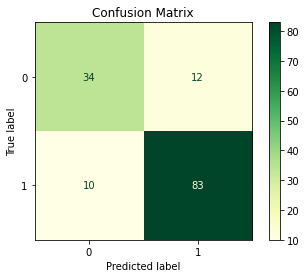

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.881578947368421
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.57      0.79      0.66        33
           1       0.96      0.90      0.93       195

    accuracy                           0.88       228
   macro avg       0.76      0.84      0.79       228
weighted avg       0.90      0.88      0.89       228

----------------------------------------------------------------------------------------------------


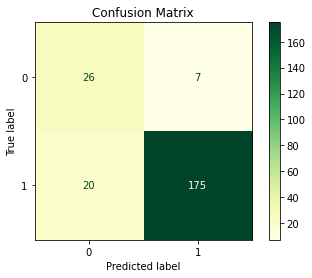

----------------------------------------------------------------------------------------------------


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics

clf=GaussianNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a2.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b2.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# Bernoulli Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.7553956834532374
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.73      0.41      0.53        46
           1       0.76      0.92      0.83        93

    accuracy                           0.76       139
   macro avg       0.75      0.67      0.68       139
weighted avg       0.75      0.76      0.73       139

----------------------------------------------------------------------------------------------------


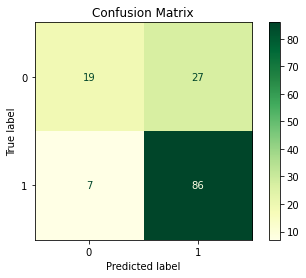

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.8859649122807017
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.65      0.45      0.54        33
           1       0.91      0.96      0.94       195

    accuracy                           0.89       228
   macro avg       0.78      0.71      0.74       228
weighted avg       0.87      0.89      0.88       228

----------------------------------------------------------------------------------------------------


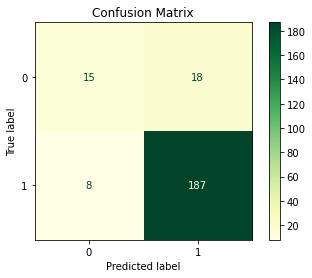

----------------------------------------------------------------------------------------------------


In [23]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets, metrics

clf=BernoulliNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a2.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b2.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# Multinomial Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.8129496402877698
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.73      0.70      0.71        46
           1       0.85      0.87      0.86        93

    accuracy                           0.81       139
   macro avg       0.79      0.78      0.79       139
weighted avg       0.81      0.81      0.81       139

----------------------------------------------------------------------------------------------------


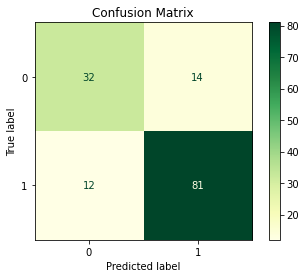

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.8464912280701754
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.47      0.55      0.51        33
           1       0.92      0.90      0.91       195

    accuracy                           0.85       228
   macro avg       0.70      0.72      0.71       228
weighted avg       0.86      0.85      0.85       228

----------------------------------------------------------------------------------------------------


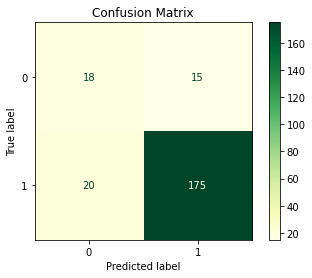

----------------------------------------------------------------------------------------------------


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, metrics

clf=MultinomialNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a2.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b2.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# KNN

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.8633093525179856
----------------------------------------------------------------------------------------------------


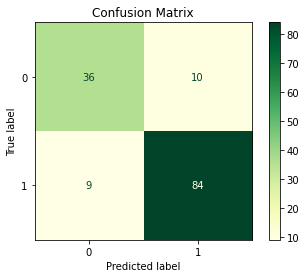

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.9166666666666666
----------------------------------------------------------------------------------------------------


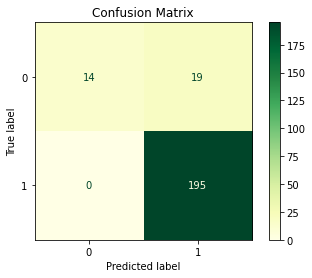

----------------------------------------------------------------------------------------------------


In [25]:
from sklearn import neighbors

knn_params = {'n_neighbors':[x for x in range(1,20,2)],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
grid=GridSearchCV(neighbors.KNeighborsClassifier(),knn_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a2.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

print('\t\tPORTUGUESE\n')
print("-"*100)
grid.fit(X_train_por,y_train_por)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_por,y_test_por))
b2.append(grid.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# SVM

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'C': 0.1, 'degree': 1, 'kernel': 'linear'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.9136690647482014
----------------------------------------------------------------------------------------------------


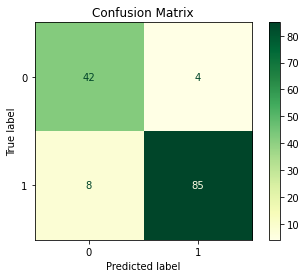

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'C': 10, 'degree': 1, 'kernel': 'poly'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.9473684210526315
----------------------------------------------------------------------------------------------------


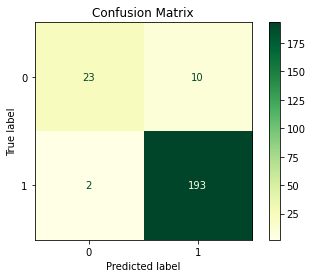

----------------------------------------------------------------------------------------------------


In [26]:
from sklearn.svm import SVC

svc_params={'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear','rbf','poly','sigmoid'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),svc_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a2.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn).ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)


print('\t\tPORTUGUESE\n')
grid.fit(X_train_por,y_train_por)
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_por,y_test_por))
b2.append(grid.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_por, y_test_por, cmap=plt.cm.YlGn).ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

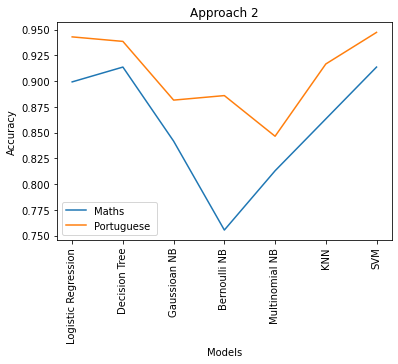

In [27]:
x = [0,1,2,3,4,5,6]
labels = ['Logistic Regression', 'Decision Tree', 'Gaussioan NB', 'Bernoulli NB', 'Multinomial NB', 'KNN', 'SVM']
plt.xticks(x, labels, rotation ='vertical')
plt.plot(a2)
plt.plot(b2)
plt.title("Approach 2")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(["Maths", "Portuguese "])

plt.show()

## Conclusion-2

In this approach we see that accuracy of all the models have increased significantly with DT,SVM and Logistic Regression having the highest accuracies in that order. This can be seen due to the decrease in number of classes from 4 to 2 which made it a 2-Level Classification and given the past results (G1 and G2) it was easy to predict G3. The low degree in SVM also points to the fact that the data have very less or no outliers which is also evident from the high logistic regression accuracy as we are aware of the sensitivity of LogReg to the presence of outliers.

# APPROACH 3 (i.e. without G1,G2) :-

In this approach we used Logistic Regression, Decision Tree Classifier, Gaussian Naive Bayes, Bernoulli Naive Bayes, Multinomial Naive Bayes, KNN and SVM modles and grid search used for hyperparameter tuning

In [28]:
labelencoder=LabelEncoder()
mat=pd.read_csv('student-mat.csv', sep=';')
por=pd.read_csv('student-por.csv', sep=';')
for val in mat:
    if isinstance(mat[val][1], str):mat[val] = labelencoder.fit_transform(mat[val])
for val in por:
    if isinstance(por[val][1], str):por[val] = labelencoder.fit_transform(por[val])
        
mat['G3'] = np.where((mat['G3'] <=9), 0, mat['G3'])
mat['G3'] = np.where((mat['G3'] >9), 1, mat['G3'])

por['G3'] = np.where((por['G3'] <=9), 0, por['G3'])
por['G3'] = np.where((por['G3'] >9), 1, por['G3'])
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,0
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,1
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,0
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,1


In [29]:
por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,1
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,0
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,1


In [30]:
from sklearn.model_selection import train_test_split
X_train_mat,X_test_mat,y_train_mat,y_test_mat=train_test_split(mat.iloc[:,:-3],mat.iloc[:,-1],test_size=0.35)
X_train_por,X_test_por,y_train_por,y_test_por=train_test_split(por.iloc[:,:-3],por.iloc[:,-1],test_size=0.35)

# Logistic regression

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.5827338129496403
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.41      0.21      0.28        53
           1       0.62      0.81      0.71        86

    accuracy                           0.58       139
   macro avg       0.52      0.51      0.49       139
weighted avg       0.54      0.58      0.54       139

----------------------------------------------------------------------------------------------------


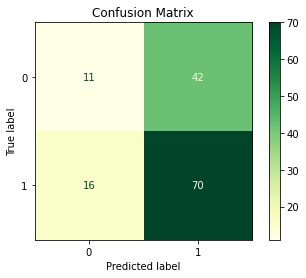

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.8464912280701754
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.45      0.27      0.34        33
           1       0.88      0.94      0.91       195

    accuracy                           0.85       228
   macro avg       0.67      0.61      0.63       228
weighted avg       0.82      0.85      0.83       228

----------------------------------------------------------------------------------------------------


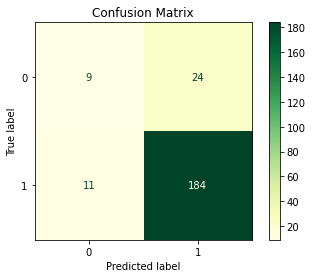

----------------------------------------------------------------------------------------------------


In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_mat,y_train_mat)
y_pred_mat=logreg.predict(X_test_mat)
print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a3.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(logreg, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

logreg.fit(X_train_por,y_train_por)
y_pred_por=logreg.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b3.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(logreg, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# Decision Tree Classifier

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'criterion': 'gini', 'max_depth': 2}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.6187050359712231
----------------------------------------------------------------------------------------------------


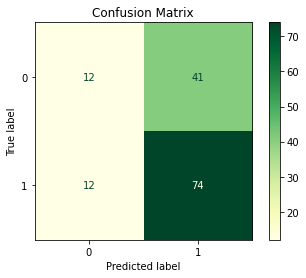

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'criterion': 'entropy', 'max_depth': 3}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.8421052631578947
----------------------------------------------------------------------------------------------------


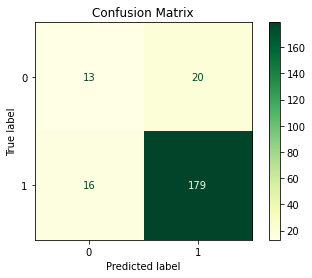

----------------------------------------------------------------------------------------------------


In [32]:
dt_params = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,7,8,9,10,15,20]}
grid=GridSearchCV(DecisionTreeClassifier(),dt_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a3.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

print('\t\tPORTUGUESE\n')
print("-"*100)
grid2=GridSearchCV(DecisionTreeClassifier(),dt_params)
grid2.fit(X_train_por,y_train_por)
print('Best Parameters: ',grid2.best_params_)
print("-"*100)
print('Best Accuracy: ',grid2.score(X_test_por,y_test_por))
b3.append(grid2.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid2, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

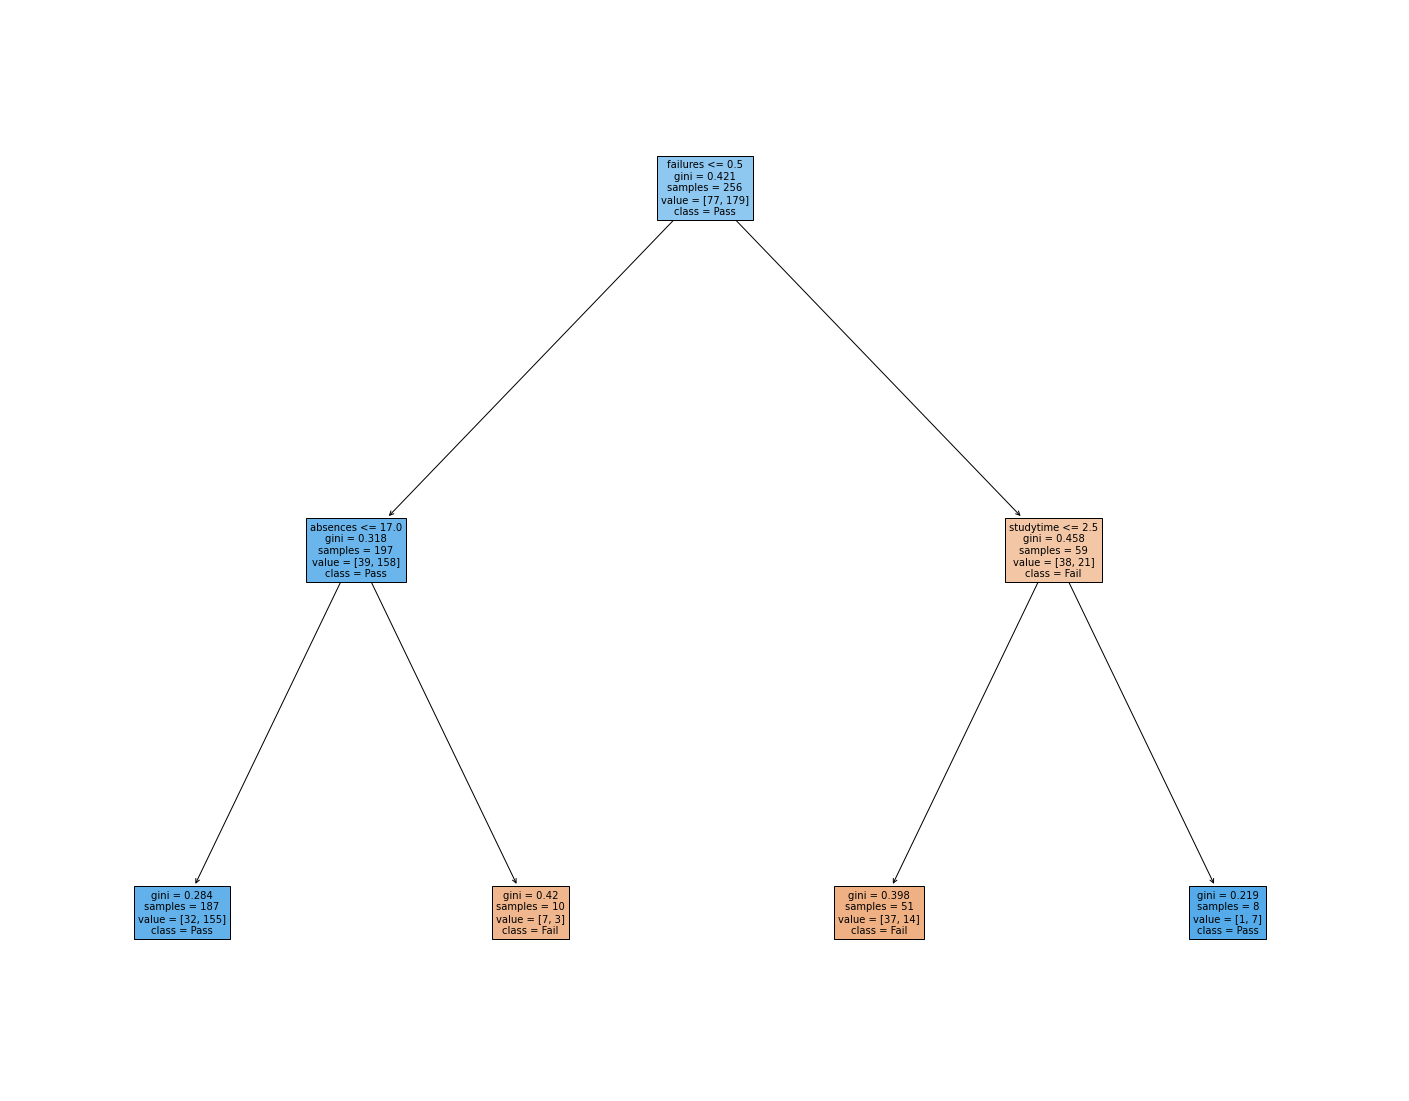

In [33]:
clf = DecisionTreeClassifier(criterion=grid.best_params_['criterion'], max_depth=grid.best_params_['max_depth']).fit(X_train_mat,y_train_mat)
lis=list(mat.columns)
lis.remove('G3')
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=lis,  
                   class_names=['Fail','Pass'],
                   filled=True,fontsize=10)

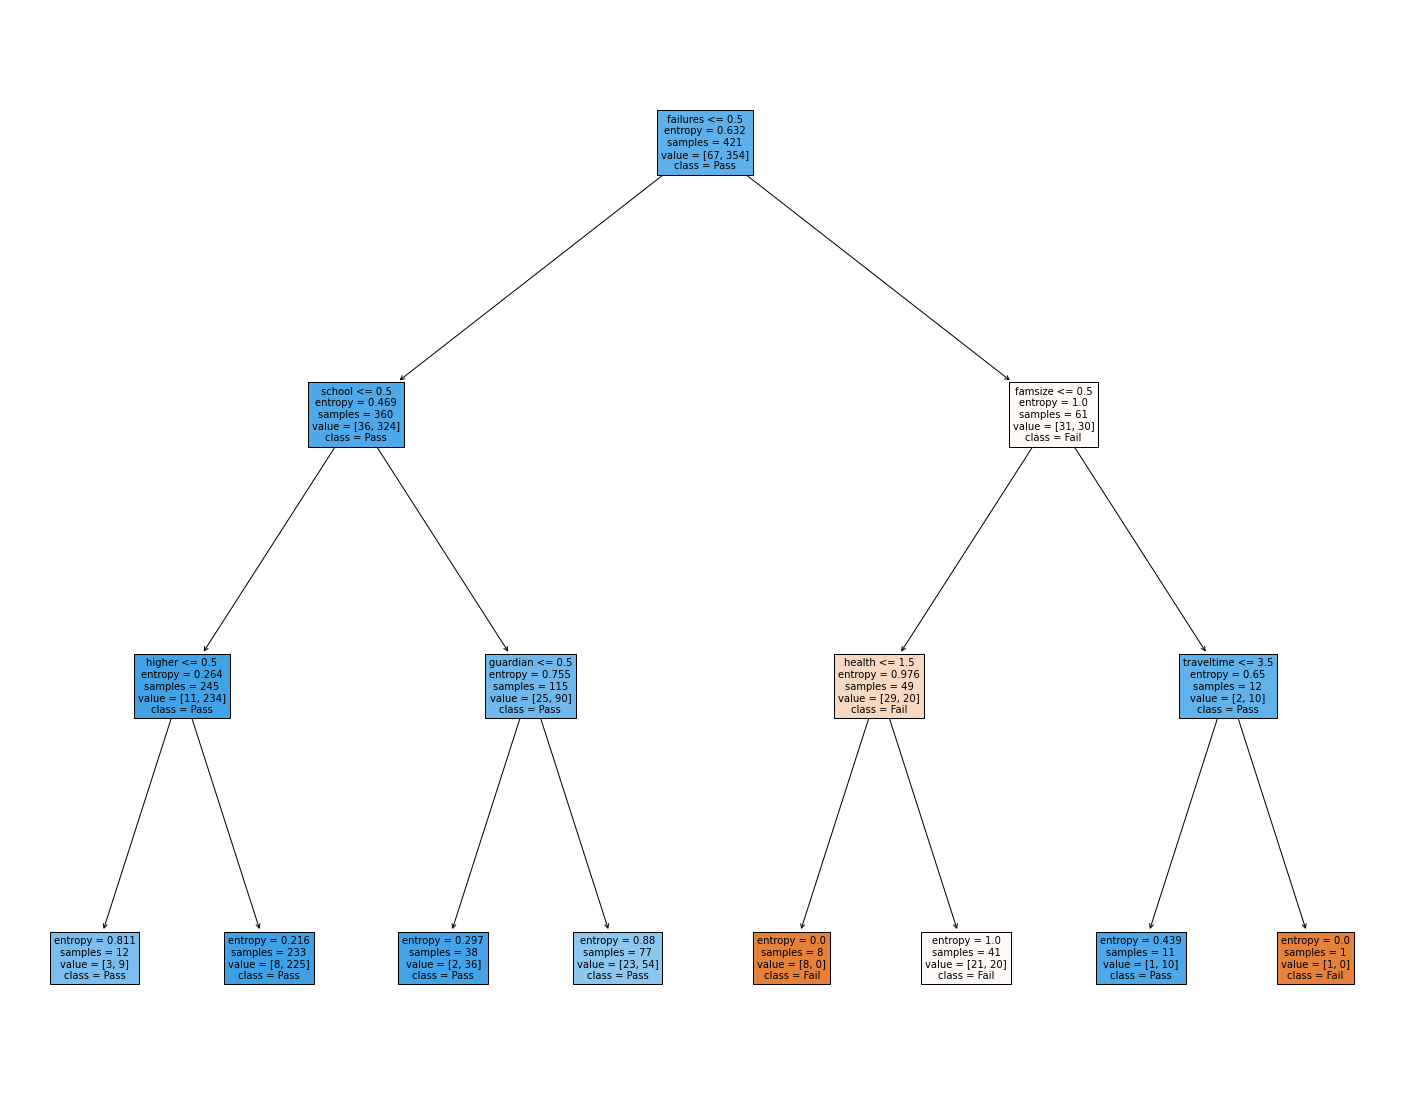

In [34]:
clf = DecisionTreeClassifier(criterion=grid2.best_params_['criterion'], max_depth=grid2.best_params_['max_depth']).fit(X_train_por,y_train_por)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=lis,  
                   class_names=['Fail','Pass'],
                   filled=True,fontsize=10)

# Gaussian Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.60431654676259
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.45      0.19      0.27        53
           1       0.63      0.86      0.73        86

    accuracy                           0.60       139
   macro avg       0.54      0.52      0.50       139
weighted avg       0.56      0.60      0.55       139

----------------------------------------------------------------------------------------------------


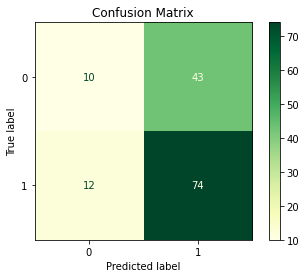

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy: 0.8508771929824561
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.49      0.67      0.56        33
           1       0.94      0.88      0.91       195

    accuracy                           0.85       228
   macro avg       0.71      0.77      0.74       228
weighted avg       0.87      0.85      0.86       228

----------------------------------------------------------------------------------------------------


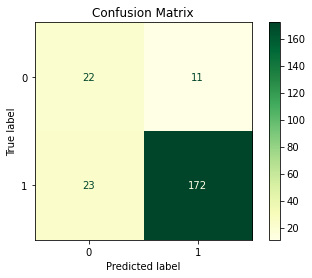

----------------------------------------------------------------------------------------------------


In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics

clf=GaussianNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a3.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy:',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b3.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# Bernoulli Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.6402877697841727
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.57      0.23      0.32        53
           1       0.65      0.90      0.75        86

    accuracy                           0.64       139
   macro avg       0.61      0.56      0.54       139
weighted avg       0.62      0.64      0.59       139

----------------------------------------------------------------------------------------------------


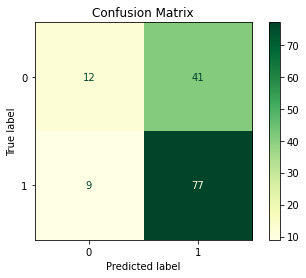

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.8464912280701754
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.47      0.48      0.48        33
           1       0.91      0.91      0.91       195

    accuracy                           0.85       228
   macro avg       0.69      0.70      0.69       228
weighted avg       0.85      0.85      0.85       228

----------------------------------------------------------------------------------------------------


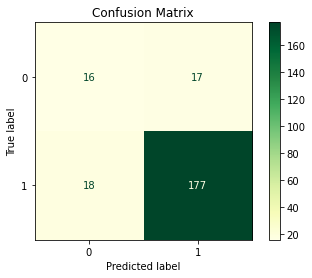

----------------------------------------------------------------------------------------------------


In [36]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets, metrics

clf=BernoulliNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a3.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b3.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# Multinomial Naive Bayes

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Accuracy:  0.6115107913669064
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.48      0.25      0.33        53
           1       0.64      0.84      0.73        86

    accuracy                           0.61       139
   macro avg       0.56      0.54      0.53       139
weighted avg       0.58      0.61      0.57       139

----------------------------------------------------------------------------------------------------


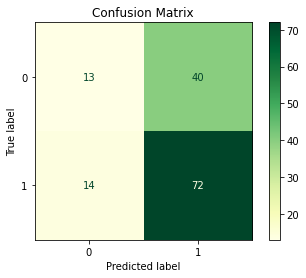

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Accuracy:  0.8464912280701754
----------------------------------------------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.47      0.52      0.49        33
           1       0.92      0.90      0.91       195

    accuracy                           0.85       228
   macro avg       0.69      0.71      0.70       228
weighted avg       0.85      0.85      0.85       228

----------------------------------------------------------------------------------------------------


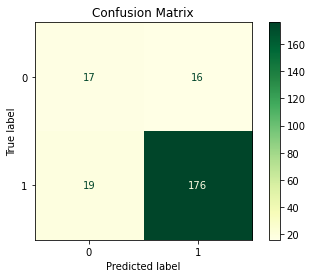

----------------------------------------------------------------------------------------------------


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, metrics

clf=MultinomialNB()
clf.fit(X_train_mat, y_train_mat)
y_pred_mat=clf.predict(X_test_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
a3.append(metrics.accuracy_score(y_test_mat, y_pred_mat, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_mat, y_pred_mat))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

clf.fit(X_train_por, y_train_por)
y_pred_por=clf.predict(X_test_por)
print('\t\tPORTUGUESE\n')
print("-"*100)
print('Accuracy: ',metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
b3.append(metrics.accuracy_score(y_test_por, y_pred_por, normalize=True))
print("-"*100)
print("Report: ",metrics.classification_report(y_test_por, y_pred_por))
print("-"*100)
disp = plot_confusion_matrix(clf, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# KNN

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.6258992805755396
----------------------------------------------------------------------------------------------------


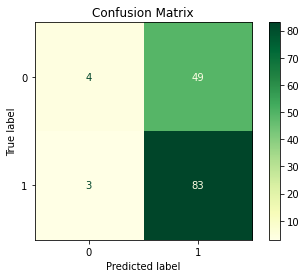

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.8333333333333334
----------------------------------------------------------------------------------------------------


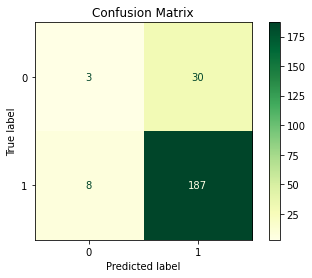

----------------------------------------------------------------------------------------------------


In [38]:
from sklearn import neighbors

knn_params = {'n_neighbors':[x for x in range(1,20,2)],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
grid=GridSearchCV(neighbors.KNeighborsClassifier(),knn_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a3.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

print('\t\tPORTUGUESE\n')
grid.fit(X_train_por,y_train_por)
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_por,y_test_por))
b3.append(grid.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_por, y_test_por, cmap=plt.cm.YlGn)
disp.ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

# SVM

----------------------------------------------------------------------------------------------------
		MATHS

----------------------------------------------------------------------------------------------------
Best Parameters:  {'C': 10, 'degree': 2, 'kernel': 'poly'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.6474820143884892
----------------------------------------------------------------------------------------------------


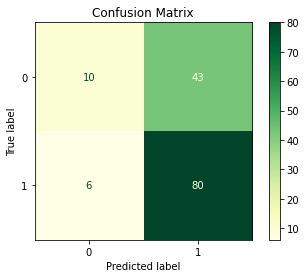

----------------------------------------------------------------------------------------------------
		PORTUGUESE

----------------------------------------------------------------------------------------------------
Best Parameters:  {'C': 100, 'degree': 2, 'kernel': 'poly'}
----------------------------------------------------------------------------------------------------
Best Accuracy:  0.8245614035087719
----------------------------------------------------------------------------------------------------


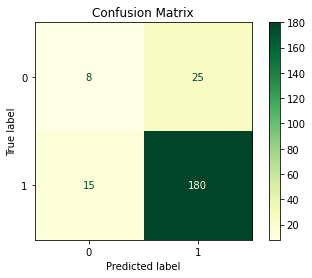

----------------------------------------------------------------------------------------------------


In [39]:
from sklearn.svm import SVC

svc_params={'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear','rbf','poly','sigmoid'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),svc_params)
grid.fit(X_train_mat,y_train_mat)

print("-"*100)
print('\t\tMATHS\n')
print("-"*100)
print('Best Parameters: ',grid.best_params_)
print("-"*100)
print('Best Accuracy: ',grid.score(X_test_mat,y_test_mat))
a3.append(grid.score(X_test_mat,y_test_mat))
print("-"*100)
disp = plot_confusion_matrix(grid, X_test_mat, y_test_mat, cmap=plt.cm.YlGn).ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)


print('\t\tPORTUGUESE\n')
print("-"*100)
grid1=GridSearchCV(SVC(),svc_params)
grid1.fit(X_train_por,y_train_por)
print('Best Parameters: ',grid1.best_params_)
print("-"*100)
print('Best Accuracy: ',grid1.score(X_test_por,y_test_por))
b3.append(grid1.score(X_test_por,y_test_por))
print("-"*100)
disp = plot_confusion_matrix(grid1, X_test_por, y_test_por, cmap=plt.cm.YlGn).ax_.set_title('Confusion Matrix')
plt.show()
print("-"*100)

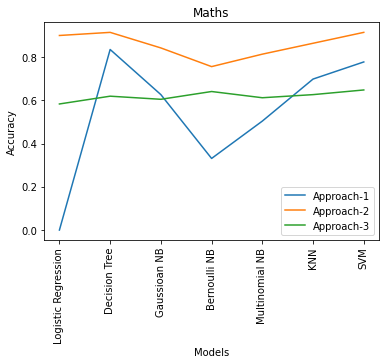

In [40]:
x = [0,1,2,3,4,5,6]
labels = ['Logistic Regression', 'Decision Tree', 'Gaussioan NB', 'Bernoulli NB', 'Multinomial NB', 'KNN', 'SVM']
plt.xticks(x, labels, rotation ='vertical')
plt.plot(a1)
plt.plot(a2)
plt.plot(a3)
plt.title("Maths")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(["Approach-1", "Approach-2", "Approach-3"])

plt.show()

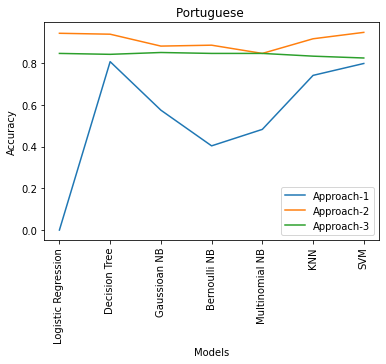

In [41]:
x = [0,1,2,3,4,5,6]
labels = ['Logistic Regression', 'Decision Tree', 'Gaussioan NB', 'Bernoulli NB', 'Multinomial NB', 'KNN', 'SVM']
plt.xticks(x, labels, rotation ='vertical')
plt.plot(b1)
plt.plot(b2)
plt.plot(b3)
plt.title("Portuguese ")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(["Approach-1", "Approach-2", "Approach-3"])

plt.show()

## Final Conclusion

In this approach we did not consider past marks (G1 and G2) for the prediction of G3. The test results bared us very useful information. The test accuracies of every model did fall as expeccted but it was still a very appreciable accuracy with Logistic Regeression and KNN showing accuracies touching the 0.8 mark. 

By this we infer that when in approach 1 we concluded that the features other than past marks(G1 and G2) were considered irrelevant, they, in fact are not irrelevant, one can, to some extent predict the passing or failing of a student by looking at other factors like school, absencies, studytime (which were shown to be the most prominent features in Decision Tree). So, the wide no. of features in this dataset helped us to draw to the conclusion that although past marks are the most prominent features to predict the value of final result(G3), other surrounding features should not be considered irrelevant and in the absence of G1 and G2 i.e. past marks one can predict the final result with appreciable accuracy. 